In [26]:
import pandas as pd
import numpy as np
import random
import statsmodels.api as sm
import graphviz as gr

random.seed(10)

$y_i = \alpha+\tau*T_i+\beta'*X_i+e_i$

#### Preset Monte Carlo Functions

In [27]:
### Monte Carlo controlled scenario ###

class mc_control(): #https://www.geeksforgeeks.org/__init__-in-python/
    
    def __init__(self, reps):
        self.reps = reps
        
    def simulation(self, alpha, tau, err, n):
        mean = 10
        sd = 5
        beta = 2
        
#         if setting == 1: # The case where X is a covariate
        X = np.random.normal(mean,sd,n) 
        T = np.random.binomial(1,0.5,n)
        Y = np.random.normal(alpha + tau*T + beta*X,sd).astype(int)
            
        elif setting == 2: # The case where X is a confounder
            X = np.random.normal(mean,sd,n)
            T = np.random.binomial(1,1/(1+abs(X)),n)
            Y = np.random.normal(alpha + tau*T + beta*X,sd).astype(int)
            
        elif setting == 3: # The case where X is a selection bias
            X = np.random.normal(np.mean(T)*np.mean(Y),sd,n)
            T = np.random.binomial(1,0.5,n)
            Y = np.random.normal(alpha + tau*T,sd).astype(int)
            
        return(Y,T)
    
    def ols_reg(self, Y, T): #https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html
        model = sm.OLS(Y, sm.add_constant(T))
        results = model.fit()
        
        return results.params
    
    def ols_with_simulation(self, alpha, tau, err, n):
        bias = []
        RMSE = []
        tau_est = []
        
        for r in range(self.reps):
            Y,T = self.simulation(alpha, tau, err, n)
            alpha_hat, tau_hat = self.ols_reg(Y,T)
            y_hat = alpha_hat + tau_hat*T
            tau_est = tau_est + [tau_hat]
            bias = bias + [np.mean(Y==1) - np.mean(Y==0)]
            RMSE = [np.sqrt(np.mean((Y-y_hat)**2))]
            
        return bias, RMSE, tau_est
    
    def conclusion(self, alpha, tau, err, n):
        bias, RMSE, tau_est = self.ols_with_simulation(alpha, tau, err, n)
        print(f'bias= {np.mean(bias): } \n')
        print(f'RMSE= {np.mean(RMSE): } \n')
        print(f'Treatment Effect= {np.mean(tau_est): } \n')

SyntaxError: invalid syntax (Temp/ipykernel_7352/2168340179.py, line 18)

In [28]:
### Monte Carlo not-controlled scenario ###
class mc_no_control(): #https://www.geeksforgeeks.org/__init__-in-python/
    
    def __init__(self, reps):
        self.reps = reps
        
    def simulation(self, alpha, tau, beta, err, n):
        mean = 10
        sd = 5
        
#         if setting == 1: # The case where X is a covariate
        X = np.random.normal(mean,sd,n) 
        T = np.random.binomial(1,0.5,n)
        Y = np.random.normal(alpha + tau*T + beta*X,sd).astype(int)
            
        elif setting == 2: # The case where X is a confounder
            X = np.random.normal(mean,sd,n)
            T = np.random.binomial(1,1/(1+abs(X)),n)
            Y = np.random.normal(alpha + tau*T + beta*X,sd).astype(int)
            
        elif setting == 3: # The case where X is a selection bias
            X = np.random.normal(np.mean(T)*np.mean(Y),sd,n)
            T = np.random.binomial(1,0.5,n)
            Y = np.random.normal(alpha + tau*T,sd).astype(int)
            
        return(Y,T)
    
    def ols_reg(self, Y, T): #https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html
        model = sm.OLS(Y, sm.add_constant(T))
        results = model.fit()
        
        return results.params
    
    def ols_with_simulation(self, alpha, tau, beta, err, n):
        bias = []
        RMSE = []
        tau_est = []
        
        for r in range(self.reps):
            Y,T = self.simulation(alpha, tau, beta, err, n)
            alpha_hat, tau_hat = self.ols_reg(Y,T)
            y_hat = alpha_hat + tau_hat*T
            tau_est = tau_est + [tau_hat]
            bias = bias + [np.mean(Y==1) - np.mean(Y==0)]
            RMSE = [np.sqrt(np.mean((Y-y_hat)**2))]
            
        return bias, RMSE, tau_est
    
    def conclusion(self, alpha, tau, beta, err, n):
        bias, RMSE, tau_est = self.ols_with_simulation(alpha, tau, beta, err, n)
        print(f'bias= {np.mean(bias): } \n')
        print(f'RMSE= {np.mean(RMSE): } \n')
        print(f'Treatment Effect= {np.mean(tau_est): } \n')

SyntaxError: invalid syntax (Temp/ipykernel_7352/2800608709.py, line 16)

### Question 1

##### 1.1 Stimulate DGP

In [29]:
#Let
n = 100
mean = 10
sd = 5
alpha = 5
tau = 4
beta = 2

#Generate
X = np.random.normal(mean,sd,n)
T = np.random.binomial(1,0.5,n)
Y = np.random.normal(alpha + tau*T + beta*X,sd).astype(int)

##### 1.2 DAG Illustration

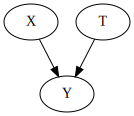

In [30]:
g = gr.Digraph()
g.edge("X", "Y")
g.edge("T", "Y")
g

##### 1.3 Monte Carlo

In [31]:
setting = 1
mc_a_100 = mc_control(10000)
mc_a_100.conclusion(5,4,1,100)

bias= -0.0013720000000000002 

RMSE=  12.409174285541557 

Treatment Effect=  4.009045838269356 



In [32]:
setting = 1
mc_a_100 = mc_no_control(10000)
mc_a_100.conclusion(5,4,2,1,1000)

bias= -0.0013381 

RMSE=  11.422538842222206 

Treatment Effect=  3.9859698488967594 



In [33]:
setting = 1
mc_b_100 = mc_control(10000)
mc_b_100.conclusion(5,4,1,100)

bias= -0.00135 

RMSE=  9.692522891383854 

Treatment Effect=  3.9718933439347905 



In [34]:
setting = 1
mc_b_1000 = mc_no_control(10000)
mc_b_1000.conclusion(5,4,2,1,100)

bias= -0.0014869999999999998 

RMSE=  8.886394094344455 

Treatment Effect=  3.983357787073332 



##### 1.4 Example

Y: average housing price in a specific area <br>
X: average housing income in the respective region <br>
T: whether the area is identified as opportunity zone (targeted for gentrification)

### Question 2

##### 2.1 Stimulate DGP

In [35]:
#Let
n = 100
mean = 10
sd = 5
alpha = 5
tau = 4
beta = 2

#Generate
X = np.random.normal(mean,sd,n)
T = np.random.binomial(1,1/(1+abs(X)),n)
Y = np.random.normal(alpha + tau*T + beta*X,sd).astype(int)

##### 2.2 DAG Illustration

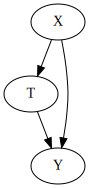

In [36]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("T", "Y")
g.edge("X", "Y")
g

##### 2.3 Monte Carlo

In [37]:
setting = 2
mc_a_100 = mc_control(10000)
mc_a_100.conclusion(5,4,1,100)

bias= -0.001143 

RMSE=  10.053057325243593 

Treatment Effect=  3.99530944731584 



In [39]:
setting = 2
mc_a_100 = mc_no_control(10000)
mc_a_100.conclusion(5,4,2,1,1000)

bias= -0.0013529000000000002 

RMSE=  11.180226599402275 

Treatment Effect=  4.0004441833802575 



In [40]:
setting = 2
mc_b_100 = mc_control(10000)
mc_b_100.conclusion(5,4,1,100)

bias= -0.00135 

RMSE=  11.60490437367792 

Treatment Effect=  3.9574283585130106 



In [41]:
setting = 2
mc_b_1000 = mc_no_control(10000)
mc_b_1000.conclusion(5,4,2,1,100)

bias= -0.0013810000000000003 

RMSE=  10.874404864608467 

Treatment Effect=  4.010143362203938 



##### 2.4 Example

Y: average salary <br>
X: race <br>
T: whether the person went to college

### Question 3

##### 3.1 Stimulate DGP

In [44]:
#Let
n = 100
mean = 10
sd = 5
alpha = 5
tau = 4
beta = 2

#Generate
X = np.random.normal(np.mean(T)*np.mean(Y),sd,n)
T = np.random.binomial(1,0.5,n)
Y = np.random.normal(alpha + tau*T,sd).astype(int)

##### 3.2 DAG Illustration

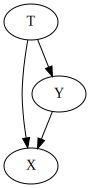

In [45]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g

##### 3.3 Monte Carlo

In [46]:
setting = 3
mc_a_100 = mc_control(10000)
mc_a_100.conclusion(5,4,1,100)

bias= -0.001395 

RMSE=  11.452026014456848 

Treatment Effect=  3.964627597126037 



In [47]:
setting = 3
mc_a_100 = mc_no_control(10000)
mc_a_100.conclusion(5,4,2,1,1000)

bias= -0.0013677 

RMSE=  11.368471256027803 

Treatment Effect=  3.989837129247256 



In [48]:
setting = 3
mc_b_100 = mc_control(10000)
mc_b_100.conclusion(5,4,1,100)

bias= -0.0014190000000000001 

RMSE=  10.513745089591628 

Treatment Effect=  4.035653351834273 



In [49]:
setting = 3
mc_b_1000 = mc_no_control(10000)
mc_b_1000.conclusion(5,4,2,1,100)

bias= -0.0014529999999999999 

RMSE=  12.321835719070268 

Treatment Effect=  3.9505266440168874 

